In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

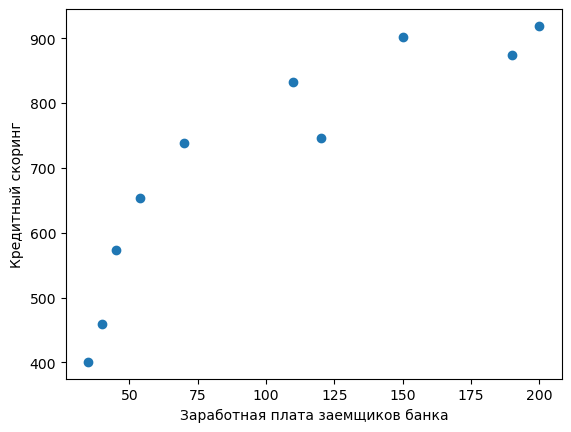

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#Построим график, для подтверждения возможной линейной зависимости
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков банка')
plt.ylabel('Кредитный скоринг')
plt.show()

2.6205388824027653
444.17735732435955
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


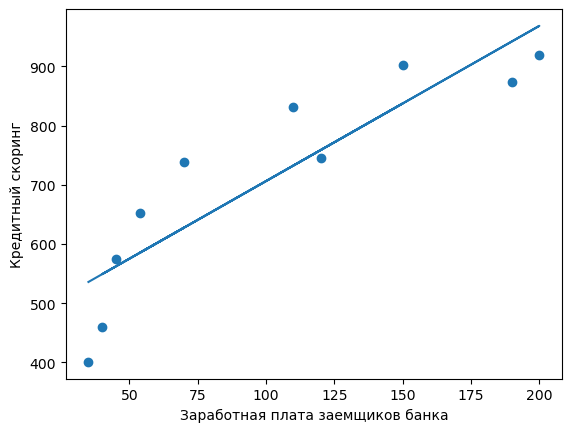

In [3]:
#На графике наблюдается некоторая зависимость между переменными
#1 вариант расчета c использованием интерсепта
#Вычислим коэффициент Beta 1
n_1 = len(zp)
beta_1 = (n_1*np.sum(zp*ks) - np.sum(zp)*np.sum(ks))/(n_1*np.sum(zp**2) - np.sum(zp)**2)
print(beta_1)
#Находим Beta 0(интерсепт)
beta_0 = np.mean(ks) - beta_1*np.mean(zp)
print(beta_0)
#Вычисляем оценочные значения
ks_pred = beta_0 + beta_1*zp
print(ks_pred)

#Отобразим полученные результаты на графике
plt.scatter(zp, ks)
plt.plot(zp, beta_0 + beta_1*zp)
plt.xlabel('Заработная плата заемщиков банка')
plt.ylabel('Кредитный скоринг')
plt.show()

In [4]:
#Второй вариант расчета с интерсептом при помощи матричного метода 
#Преобразовываем массив в вектор-столбец
x1 = zp.reshape(len(zp),1)
print(x1,"\n")
y1 = ks.reshape(len(ks),1)
print(y1,"\n")

#Добавляем столбец единиц, т.к. используем модель с интерсептом
x1 = np.hstack([np.ones((len(zp),1)),x1])
print(x1)

[[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]] 

[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]] 

[[  1.  35.]
 [  1.  45.]
 [  1. 190.]
 [  1. 200.]
 [  1.  40.]
 [  1.  70.]
 [  1.  54.]
 [  1. 150.]
 [  1. 120.]
 [  1. 110.]]


In [5]:
#Используем формулу для расчета B = (X^T*X)^(-1)*X^T*Y
beta_1_1 = np.dot(np.linalg.inv(np.dot(x1.T,x1)),x1.T@y1)
print(beta_1_1)

[[444.17735732]
 [  2.62053888]]


5.889820420132689
[ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


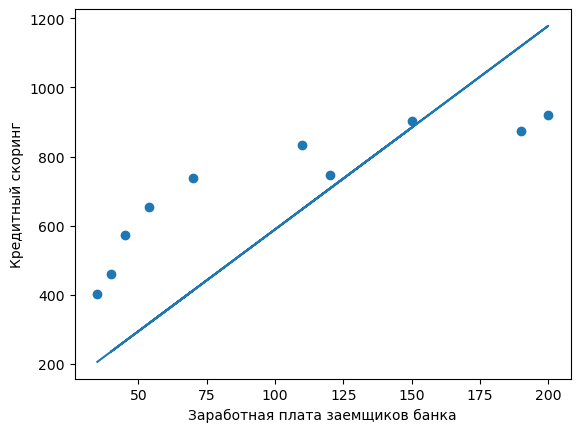

In [6]:
#Расчет без интерсепта
#Формула для расчета коэффициента Beta без интерсепта
beta_1_2 = (np.sum(zp*ks))/(np.sum(zp**2))
print(beta_1_2)

#Вычисляем оценочные значения
ks_pred_1_2 =  beta_1_2*zp
print(ks_pred_1_2)

#Отобразим полученные результаты на графике
plt.scatter(zp, ks)
plt.plot(zp, ks_pred_1_2)
plt.xlabel('Заработная плата заемщиков банка')
plt.ylabel('Кредитный скоринг')
plt.show()

In [7]:
#Расчет матричным методом без интерсепта
x1_2 = zp.reshape(len(zp),1)
print(x1_2,"\n")
y1_2 = ks.reshape(len(ks),1)
print(y1_2,"\n")
beta_1_22 = np.dot(np.linalg.inv(np.dot(x1_2.T,x1_2)),x1_2.T@y1_2)
print(beta_1_22)

[[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]] 

[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]] 

[[5.88982042]]


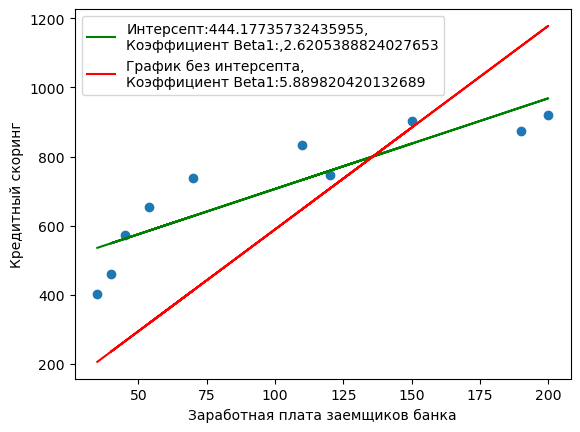

In [8]:
#Совместим полученные значения на общем графике
plt.scatter(zp, ks)
plt.plot(zp, ks_pred,color = 'green', label = f'Интерсепт:{beta_0},\nКоэффициент Beta1:,{beta_1}')
plt.plot(zp,ks_pred_1_2, color = 'red',label = f'График без интерсепта,\nКоэффициент Beta1:{beta_1_2}')
plt.xlabel('Заработная плата заемщиков банка')
plt.ylabel('Кредитный скоринг')
plt.legend()
plt.show()

## Задача 2


Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [30]:
#Решение
#Функция потерь mse:

def mse_func(b1,x,y,n):
    return np.sum((b1*x - y)**2)/n

n_2 = len(zp)
min_mse = mse_func(beta_1_2,zp,ks,n_2)
print("Средняя квадратичная ошибка mse",min_mse,"\n")

alpha = 0.000001
B1 = 0.1
n_2 = len(zp)

#Выполняя итерации , приближаемся к минимуму.
for i in range(1000):
    B1 -= alpha*(2/n_2)*np.sum((B1*zp - ks)*zp)
    if i %100 ==0:
        
        print(f' Итерация № {i}, коэффициент Beta: {B1},mse: {mse_func(B1,zp,ks,n_2)}')

Средняя квадратичная ошибка mse 56516.85841571941 

 Итерация № 0, коэффициент Beta: 0.25952808,mse: 493237.7212546963
 Итерация № 100, коэффициент Beta: 5.54537842245223,mse: 58151.31823171113
 Итерация № 200, коэффициент Beta: 5.868748638669329,mse: 56522.97550129376
 Итерация № 300, коэффициент Beta: 5.888531320728348,mse: 56516.88130936019
 Итерация № 400, коэффициент Beta: 5.8897415574471985,mse: 56516.85850140053
 Итерация № 500, коэффициент Beta: 5.889815595583751,mse: 56516.858416040064
 Итерация № 600, коэффициент Beta: 5.889820124983314,mse: 56516.85841572062
 Итерация № 700, коэффициент Beta: 5.889820402076462,mse: 56516.85841571941
 Итерация № 800, коэффициент Beta: 5.88982041902807,mse: 56516.8584157194
 Итерация № 900, коэффициент Beta: 5.889820420065112,mse: 56516.85841571941


## Задача 3

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [29]:
#Решение
#Функция потерь mse:

def mse_func_3(a,b1,x,y,n):
    return np.sum(((a+b1*x) - y)**2)/n
           
n_3 = len(zp)  
mse_3 = mse_func_3(beta_0,beta_1,zp,ks,n_3)
print("Средняя квадратичная ошибка mse",mse_3,"\n")


A1_3 = 0.1
B1_3 = 0.1
alpha_3 = 0.00001


#Выполняя итерации , приближаемся к минимуму.
for i in range(10000000):
    A1_3 -= alpha_3*(2*np.sum(((A1_3 + B1_3*zp) - ks))/n_3)
    B1_3 -= alpha_3*(2*np.sum(((A1_3 + B1_3*zp) - ks)*zp)/n_3)             
    if i %500000 ==0:
        
        print(f' Итерация № {i}, интерсепт: {A1_3},коэффициент Beta: {B1_3},mse: {mse_func_3(A1_3,B1_3,zp,ks,n_2)}')

Средняя квадратичная ошибка mse 6470.414201176658 

 Итерация № 0, интерсепт: 0.1139932,коэффициент Beta: 1.6950496217904003,mse: 298808.66922912706
 Итерация № 500000, интерсепт: 409.03729808290353,коэффициент Beta: 2.8791839426649335,mse: 6783.645660253098
 Итерация № 1000000, интерсепт: 441.3964262548758,коэффициент Beta: 2.6410076607593775,mse: 6472.375938447427
 Итерация № 1500000, интерсепт: 443.9572786511765,коэффициент Beta: 2.6221587505224155,mse: 6470.426487340801
 Итерация № 2000000, интерсепт: 444.15994063146525,коэффициент Beta: 2.6206670763125217,mse: 6470.414278123679
 Итерация № 2500000, интерсепт: 444.1759789936681,коэффициент Beta: 2.6205490274745853,mse: 6470.414201658573
 Итерация № 3000000, интерсепт: 444.177248245355,коэффициент Beta: 2.620539685268393,mse: 6470.414201179681
 Итерация № 3500000, интерсепт: 444.17734869201206,коэффициент Beta: 2.620538945940337,mse: 6470.41420117668
 Итерация № 4000000, интерсепт: 444.17735664119317,коэффициент Beta: 2.620538887431